
*   Name: Aishwarya Bhavsar
*   CSULB ID: 029371509
*   The Boston Housing Pricing Dataset - Regression   

In [2]:
#The Boston Housing Price Dataset
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [6]:
#Normalizing the data - Data Normalization should only be performed on training data and not on testing data.
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [8]:
#Building The Network
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()                                  
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))                                        #Scalar Regression - one single continuous output.
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])   #The last layer is linear.
    return model


In [9]:
#Validating Your Approach Using K-Fold Validation
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate( 
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [15]:
model = build_model()                                                    
model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=2)      
all_scores.append(val_mae)

Epoch 1/100
303/303 [==============================] - 1s 1ms/step - loss: 191.5379 - mae: 10.5871
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 25.9877 - mae: 3.4047
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss: 20.3294 - mae: 2.9548
Epoch 4/100
303/303 [==============================] - 0s 1ms/step - loss: 16.5418 - mae: 2.6783
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 15.0872 - mae: 2.5104
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 13.9226 - mae: 2.4717
Epoch 7/100
303/303 [==============================] - 0s 1ms/step - loss: 13.1853 - mae: 2.3517
Epoch 8/100
303/303 [==============================] - 0s 1ms/step - loss: 12.7500 - mae: 2.3352
Epoch 9/100
303/303 [==============================] - 0s 1ms/step - loss: 12.4456 - mae: 2.2288
Epoch 10/100
303/303 [==============================] - 0s 1ms/step - loss: 11.9279 - mae: 2.2304
Epoch 11/100
303/303 [=====

In [16]:
all_scores

[2.3469791412353516, 2.633168935775757, 2.30665922164917]

In [17]:
np.mean(all_scores)

2.4289357662200928

In [19]:
#Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [21]:
    model = build_model()                                                    
    history = model.fit(partial_train_data, partial_train_targets,           
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

In [22]:
#Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

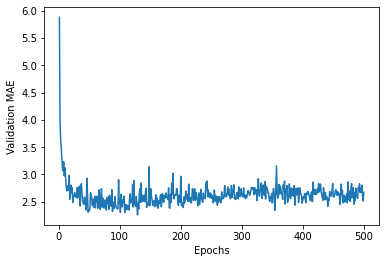

In [23]:
#Plotting validation scores
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [24]:
#Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

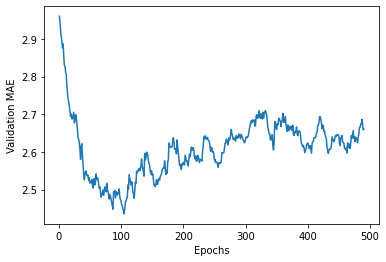

In [25]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [28]:
#Training the final model
model = build_model()                                                     
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=2)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
26/26 - 1s - loss: 496.6232 - mae: 20.3264 - 544ms/epoch - 21ms/step
Epoch 2/80
26/26 - 0s - loss: 321.8214 - mae: 15.6527 - 46ms/epoch - 2ms/step
Epoch 3/80
26/26 - 0s - loss: 169.0225 - mae: 10.4843 - 35ms/epoch - 1ms/step
Epoch 4/80
26/26 - 0s - loss: 86.4626 - mae: 7.0362 - 40ms/epoch - 2ms/step
Epoch 5/80
26/26 - 0s - loss: 51.2171 - mae: 5.2388 - 39ms/epoch - 1ms/step
Epoch 6/80
26/26 - 0s - loss: 33.9930 - mae: 4.1715 - 36ms/epoch - 1ms/step
Epoch 7/80
26/26 - 0s - loss: 25.9178 - mae: 3.5803 - 39ms/epoch - 1ms/step
Epoch 8/80
26/26 - 0s - loss: 22.6163 - mae: 3.3128 - 46ms/epoch - 2ms/step
Epoch 9/80
26/26 - 0s - loss: 20.1415 - mae: 3.0852 - 34ms/epoch - 1ms/step
Epoch 10/80
26/26 - 0s - loss: 18.3188 - mae: 2.9553 - 41ms/epoch - 2ms/step
Epoch 11/80
26/26 - 0s - loss: 16.9681 - mae: 2.8438 - 39ms/epoch - 1ms/step
Epoch 12/80
26/26 - 0s - loss: 15.6289 - mae: 2.7212 - 43ms/epoch - 2ms/step
Epoch 13/80
26/26 - 0s - loss: 14.8402 - mae: 2.6187 - 40ms/epoch - 2ms/step


In [27]:
test_mae_score

2.523228168487549